In [8]:
from lifelines import CoxPHFitter 
import xenaPython as xena
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test, multivariate_logrank_test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
INPUT_PATH= "/data/projects/shared_data/collab_data/10_transcripts/Data"
INPUT_FOLDERNAME = "tpm"
INPUT_FILENAME = "lgg_gbm.csv"

In [34]:
df = pd.read_csv(INPUT_PATH+"/"+INPUT_FOLDERNAME+"/"+INPUT_FILENAME, sep= " ")
df.rename(columns={'status': 'sample_group'}, inplace=True)
#df= df.set_index('sample')
# df = df.transpose()
# df = df.astype(float)
# df = df.reset_index(drop=True)
# df = df.rename(columns={'index': 'sample'})
df  =df.set_index('sample')
df.head()

,sample_group,ENST00000461347.5,ENST00000322723.8,ENST00000484328.1,ENST00000454824.5,ENST00000417652.5,ENST00000453992.5,ENST00000436894.1,ENST00000494618.1,ENST00000356936.5,ENST00000466274.1
sample,,,,,,,,,,,
TCGA-02-0047-01,gbm,1.940000,124.205770,-1.089298e-08,6.389815,6.847849e+01,9.999810e-02,-1.089298e-08,46.201532,49.521080,1.040022
TCGA-02-0055-01,gbm,2.059936,93.902043,-1.089298e-08,6.520031,1.199970e+00,1.299965e-01,-1.089298e-08,20.030520,45.739493,0.999971
TCGA-02-2483-01,gbm,1.700020,160.584743,1.299965e-01,2.949992,-1.089298e-08,-1.089298e-08,1.700038e-01,61.908976,134.988183,3.410012
TCGA-02-2485-01,gbm,2.840002,149.074566,-1.089298e-08,10.479968,2.092029e+01,2.199972e-01,8.100147e-01,47.510340,110.828644,4.580119
TCGA-06-0125-01,gbm,7.399896,173.728628,-1.089298e-08,22.420331,4.916878e+01,2.799918e-01,-1.089298e-08,45.209940,92.448909,4.740028


In [35]:
df_gbm= df[df['sample_group']=="gbm"]

In [36]:
df_gbm

,sample_group,ENST00000461347.5,ENST00000322723.8,ENST00000484328.1,ENST00000454824.5,ENST00000417652.5,ENST00000453992.5,ENST00000436894.1,ENST00000494618.1,ENST00000356936.5,ENST00000466274.1
sample,,,,,,,,,,,
TCGA-02-0047-01,gbm,1.940000,124.205770,-1.089298e-08,6.389815e+00,6.847849e+01,9.999810e-02,-1.089298e-08,46.201532,49.521080,1.040022
TCGA-02-0055-01,gbm,2.059936,93.902043,-1.089298e-08,6.520031e+00,1.199970e+00,1.299965e-01,-1.089298e-08,20.030520,45.739493,0.999971
TCGA-02-2483-01,gbm,1.700020,160.584743,1.299965e-01,2.949992e+00,-1.089298e-08,-1.089298e-08,1.700038e-01,61.908976,134.988183,3.410012
TCGA-02-2485-01,gbm,2.840002,149.074566,-1.089298e-08,1.047997e+01,2.092029e+01,2.199972e-01,8.100147e-01,47.510340,110.828644,4.580119
TCGA-06-0125-01,gbm,7.399896,173.728628,-1.089298e-08,2.242033e+01,4.916878e+01,2.799918e-01,-1.089298e-08,45.209940,92.448909,4.740028
...,...,...,...,...,...,...,...,...,...,...,...
TCGA-76-4927-01,gbm,1.099989,164.882131,2.999926e-01,-1.089298e-08,5.238103e+01,2.399992e-01,5.999846e-01,48.778396,111.816331,2.479963
TCGA-76-4928-01,gbm,2.230015,115.303100,1.700038e-01,1.423034e+01,7.899728e-01,5.200162e-01,-1.089298e-08,36.969432,75.138520,1.379987
TCGA-76-4929-01,gbm,3.530057,149.239987,2.199972e-01,1.046980e+01,3.088969e+01,2.599961e-01,-1.089298e-08,51.681358,91.721260,2.559987


In [37]:
print(df_gbm['ENST00000322723.8'].corr(df_gbm['ENST00000417652.5']))
 

0.5976725233297304


In [14]:
df.index

Index(['TCGA-02-0047-01', 'TCGA-02-0055-01', 'TCGA-02-2483-01',
       'TCGA-02-2485-01', 'TCGA-06-0125-01', 'TCGA-06-0129-01',
       'TCGA-06-0130-01', 'TCGA-06-0132-01', 'TCGA-06-0138-01',
       'TCGA-06-0139-01',
       ...
       'TCGA-VW-A8FI-01', 'TCGA-W9-A837-01', 'TCGA-WH-A86K-01',
       'TCGA-WY-A858-01', 'TCGA-WY-A859-01', 'TCGA-WY-A85A-01',
       'TCGA-WY-A85B-01', 'TCGA-WY-A85C-01', 'TCGA-WY-A85D-01',
       'TCGA-WY-A85E-01'],
      dtype='object', name='sample', length=662)

In [16]:
df_lgg = df[df['sample_group']=='lgg']

In [17]:
df_lgg

,sample_group,ENST00000461347.5,ENST00000322723.8,ENST00000484328.1,ENST00000454824.5,ENST00000417652.5,ENST00000453992.5,ENST00000436894.1,ENST00000494618.1,ENST00000356936.5,ENST00000466274.1
sample,,,,,,,,,,,
TCGA-CS-4938-01,lgg,0.690020,156.215172,-1.089298e-08,9.820205,3.527952e+01,0.209998,-1.089298e-08,43.630555,82.841547,1.220031
TCGA-CS-4941-01,lgg,2.269956,180.629787,1.599964e-01,31.850734,5.257017e+01,0.450000,-1.089298e-08,19.959833,58.789046,0.570015
TCGA-CS-4942-01,lgg,1.080025,181.596433,1.499979e-01,18.239837,7.032080e+01,0.470000,-1.089298e-08,35.749710,64.878914,0.530006
TCGA-CS-4943-01,lgg,0.999971,204.916587,-1.089298e-08,20.469863,7.408864e+01,0.080002,-1.089298e-08,37.769815,65.761808,0.789973
TCGA-CS-4944-01,lgg,0.739977,138.850601,-1.089298e-08,5.359992,-1.089298e-08,0.049999,-1.089298e-08,8.330060,64.421824,0.259996
...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WY-A85A-01,lgg,3.340046,140.097723,-1.089298e-08,14.950310,8.529912e+00,0.200005,-1.089298e-08,20.729744,82.847289,2.569947
TCGA-WY-A85B-01,lgg,3.650021,182.125873,-1.089298e-08,19.879746,2.750084e+00,0.230006,-1.089298e-08,43.621483,105.769977,4.029894
TCGA-WY-A85C-01,lgg,5.050108,134.530481,-1.089298e-08,6.209890,1.188013e+01,0.089999,2.500071e-01,24.820183,80.297437,3.889889


In [31]:
CANCER="GBMLGG"

In [32]:
host = xena.PUBLIC_HUBS['tcgaHub']
dataset = 'survival/{}_survival.txt'.format(CANCER)
samples = xena.dataset_samples (host, dataset, None)
features = xena.dataset_field(host, dataset)
print(features)
[position, [status,time]] = xena.dataset_probe_values(host, dataset, samples, ['OS','OS.time'])
df_status = pd.DataFrame(list(zip(samples, time, status)), columns = ['sample','time', 'status'])
df_status = df_status.set_index('sample')
df_status = df_status[df_status['time'] !=0]
print(df_status.shape)
df_status = df_status.replace('NaN', np.nan)
df_status = df_status.dropna()

['DFI', 'DFI.time', 'DSS', 'DSS.time', 'OS', 'OS.time', 'PFI', 'PFI.time', 'Redaction', '_PATIENT', 'sampleID']
(1127, 2)


In [20]:
df_status

,time,status
sample,,
TCGA-CS-4938-01,3574.0,0
TCGA-CS-4941-01,234.0,1
TCGA-CS-4942-01,1335.0,1
TCGA-CS-4943-01,1106.0,1
TCGA-CS-4944-01,1828.0,0
...,...,...
TCGA-WY-A85A-01,1320.0,0
TCGA-WY-A85B-01,1393.0,0
TCGA-WY-A85C-01,1426.0,0


In [23]:
#print(df_status.shape, df_gbm.shape)
#df_merge = pd.merge(df_gbm, df_status, on='sample')
df_merge = df_lgg.merge(df_status, left_index=True, right_index=True)
print(df_merge.head())
print(df_merge.shape)
print(df_merge.groupby(['status']).size())

                sample_group  ENST00000461347.5  ENST00000322723.8  \
sample                                                               
TCGA-CS-4938-01          lgg           0.690020         156.215172   
TCGA-CS-4941-01          lgg           2.269956         180.629787   
TCGA-CS-4942-01          lgg           1.080025         181.596433   
TCGA-CS-4943-01          lgg           0.999971         204.916587   
TCGA-CS-4944-01          lgg           0.739977         138.850601   

                 ENST00000484328.1  ENST00000454824.5  ENST00000417652.5  \
sample                                                                     
TCGA-CS-4938-01      -1.089298e-08           9.820205       3.527952e+01   
TCGA-CS-4941-01       1.599964e-01          31.850734       5.257017e+01   
TCGA-CS-4942-01       1.499979e-01          18.239837       7.032080e+01   
TCGA-CS-4943-01      -1.089298e-08          20.469863       7.408864e+01   
TCGA-CS-4944-01      -1.089298e-08           5.359992

In [24]:
s = df_merge['ENST00000322723.8']
val_list_3= s.quantile([.33, .66]).values.tolist()
val_list_2= s.quantile([.5]).values.tolist()

In [25]:
def group_3(row, val_list):
    if row['ENST00000322723.8'] < val_list[0]:
        return 0
    elif val_list[0] <= row['ENST00000322723.8'] < val_list[1]:
        return 1
    elif val_list[1] <= row['ENST00000322723.8']:
        return 2
def group_2(row, val_list):
    if row['ENST00000322723.8'] < val_list[0]:
        return 0
    else:
        return 1
    

In [26]:
df_ENST = df_merge[['ENST00000322723.8', 'time', 'status']]
df_ENST['two_group'] = df_ENST.apply(lambda row: group_2(row, val_list_2), axis=1)
df_ENST['three_group'] = df_ENST.apply(lambda row: group_3(row, val_list_3), axis=1)
# display(df.head())
df_ENST

/tmp/ipykernel_446483/3959774928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ENST['two_group'] = df_ENST.apply(lambda row: group_2(row, val_list_2), axis=1)
/tmp/ipykernel_446483/3959774928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ENST['three_group'] = df_ENST.apply(lambda row: group_3(row, val_list_3), axis=1)


,ENST00000322723.8,time,status,two_group,three_group
sample,,,,,
TCGA-CS-4938-01,156.215172,3574.0,0,0,1
TCGA-CS-4941-01,180.629787,234.0,1,1,2
TCGA-CS-4942-01,181.596433,1335.0,1,1,2
TCGA-CS-4943-01,204.916587,1106.0,1,1,2
TCGA-CS-4944-01,138.850601,1828.0,0,0,0
...,...,...,...,...,...
TCGA-WY-A85A-01,140.097723,1320.0,0,0,0
TCGA-WY-A85B-01,182.125873,1393.0,0,1,2
TCGA-WY-A85C-01,134.530481,1426.0,0,0,0


In [27]:
df_ENST.groupby('three_group').size()

three_group
0    166
1    166
2    172
dtype: int64

Text(0.5, 1.0, 'KM Plot for cluster number =3\n[pvalue: 0.41593325922650226]')

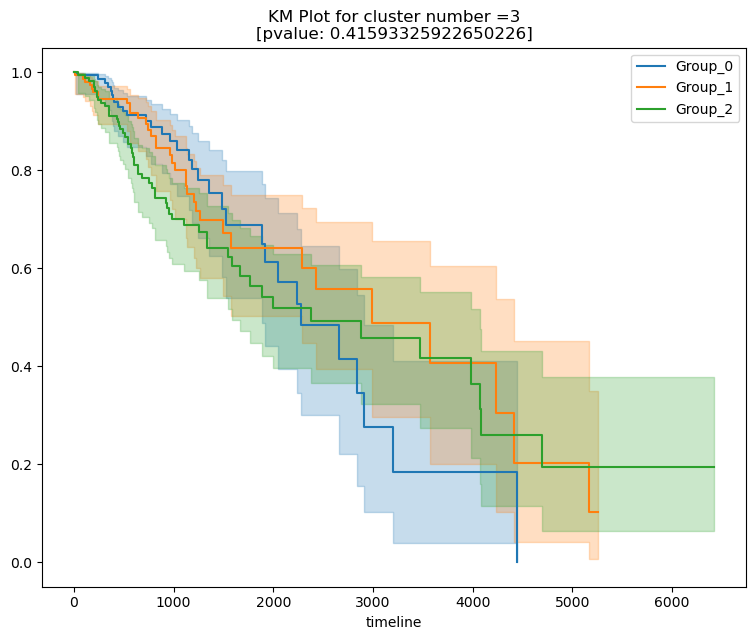

In [30]:
plt.figure(figsize=(20,7))
kmf = KaplanMeierFitter()
k=3
ax = plt.subplot(1, 2, k - 1)
for i in range(k):
    col_name = 'three_group'
    T =  df_ENST[df_ENST[col_name]==i]['time'].to_list()
    E =  df_ENST[ df_ENST[col_name]==i]['status'].to_list()
    kmf.fit(T, E, label="Group_"+str(i))
    ax = kmf.plot_survival_function(ax=ax)
result = multivariate_logrank_test(df_ENST['time'], df_ENST[col_name], df_ENST['status'])
# #print("##",result.test_statistic)
# print(k,result.p_value)
#print("IO",result.print_summary())
plt.title("KM Plot for cluster number ="+str(k)+"\n[pvalue: {}]".format(result.p_value))

In [29]:
df_ENST_quartile = df_ENST[df_ENST['three_group']!=1 ]
df_ENST_quartile

,ENST00000322723.8,time,status,two_group,three_group
sample,,,,,
TCGA-CS-4941-01,180.629787,234.0,1,1,2
TCGA-CS-4942-01,181.596433,1335.0,1,1,2
TCGA-CS-4943-01,204.916587,1106.0,1,1,2
TCGA-CS-4944-01,138.850601,1828.0,0,0,0
TCGA-CS-5393-01,136.068508,1222.0,0,0,0
...,...,...,...,...,...
TCGA-WH-A86K-01,111.352261,405.0,0,0,0
TCGA-WY-A858-01,97.598375,1337.0,0,0,0
TCGA-WY-A85A-01,140.097723,1320.0,0,0,0


0
2


Text(0.5, 1.0, 'KM Plot for cluster number =3\n[pvalue: 0.32831028915015426]')

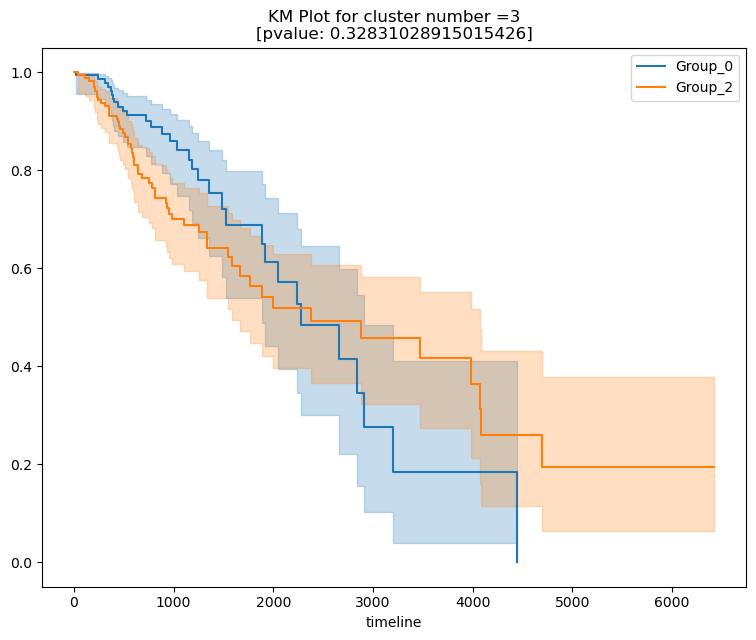

In [23]:
plt.figure(figsize=(20,7))
k=3
ax = plt.subplot(1, 2, k - 1)
for i in [0,2]:
    print(i)
    col_name = 'three_group'
    T =  df_ENST_quartile[df_ENST_quartile[col_name]==i]['time'].to_list()
    E =  df_ENST_quartile[df_ENST_quartile[col_name]==i]['status'].to_list()
    kmf.fit(T, E, label="Group_"+str(i))
    ax = kmf.plot_survival_function(ax=ax)
result = multivariate_logrank_test(df_ENST_quartile['time'], df_ENST_quartile[col_name], df_ENST_quartile['status'])
# #print("##",result.test_statistic)
# print(k,result.p_value)
#print("IO",result.print_summary())
plt.title("KM Plot for cluster number ="+str(k)+"\n[pvalue: {}]".format(result.p_value))